In [2]:
from PIL import Image
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
im = Image.open("F:/PhD_Franziska/Headon/RedBeads/GFP_skin/Epithelial_mesenchyme_recombinations_scene 2_cropped.tif")

In [4]:
tif_path = "F:/PhD_Franziska/Headon/RedBeads/GFP_skin/Epithelial_mesenchyme_recombinations_scene 2_cropped.tif"

with tiff.TiffFile(tif_path) as tif:
    image_stack = tif.asarray()

print("image shape:", image_stack.shape)

image shape: (384, 2, 1313, 1032)


channel green shape: (384, 1313, 1032)


array([[ 97,  98, 104, ..., 127, 130,  95],
       [102,  84,  91, ..., 131, 108, 122],
       [103, 110, 102, ...,  99, 121, 136],
       ...,
       [134, 164, 142, ..., 137, 126, 146],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

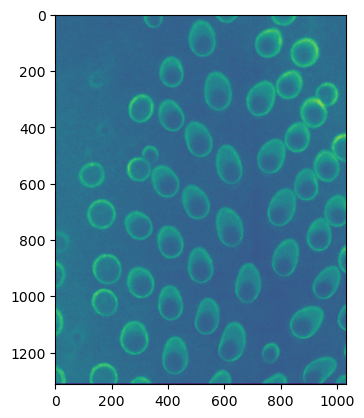

In [5]:
channel_green = image_stack[:, 0, :, :]
print("channel green shape:", channel_green.shape)
plt.imshow(channel_green[300])
channel_green[300]

In [6]:
all_green_frames = np.array(channel_green)
# print("green frame shape:", all_green_frames.shape)
all_green_frames

array([[[ 91,  84,  89, ..., 123, 114,  83],
        [100,  90,  80, ..., 111, 108,  95],
        [110, 108,  96, ...,  91, 117,  96],
        ...,
        [109, 111,  90, ...,  83,  87,  76],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[105,  87,  92, ..., 111, 106, 103],
        [ 99,  92,  95, ..., 115, 100,  98],
        [ 95, 101, 106, ...,  89,  83, 102],
        ...,
        [111, 108, 103, ...,  72,  84,  77],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 90, 107,  73, ..., 101,  88, 109],
        [ 91, 105,  99, ..., 101, 122, 100],
        [100, 102, 110, ..., 105, 119, 102],
        ...,
        [125,  95, 133, ...,  76,  72,  80],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[ 93,  79, 104, ...,  92,  91,  93],
        [107,  92, 107, ...,  96, 109, 104],
        [100, 102, 107, ...,  94,  81,  95

channel red shape: (384, 1313, 1032)


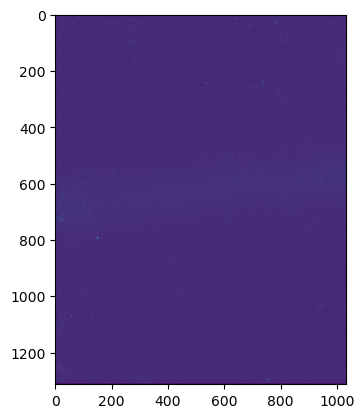

In [7]:
channel_red = image_stack[:, 1, :, :]
print("channel red shape:", channel_red.shape)
plt.imshow(channel_red[300])
all_red_frames = np.array(channel_red)

# Convert the tif image information into .h5 file. 

In [9]:
h5_file_path = "Epithelial_mesenchyme_recombinations_scene 2_cropped.h5"
with h5py.File(h5_file_path, "w") as h5f:
    h5f.create_dataset("green", data = all_green_frames)
    h5f.create_dataset("red", data = all_red_frames)

In [12]:
# open h5 files.
h5_file_path = "Epithelial_mesenchyme_recombinations_scene 2_cropped.h5"
with h5py.File(h5_file_path, "r") as h5f:
    green_channel = h5f["green"][:]
    red_channel = h5f["red"][:]

In [16]:
# plt.imshow(red_channel[60])

# Cut subregion

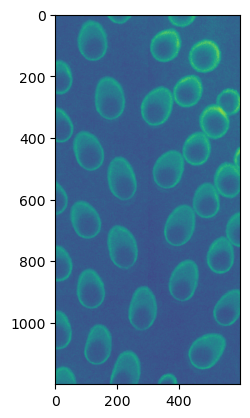

In [16]:
plt.imshow(channel_green[300][0:1200, 400:1000]) # (y-axis, x-axis)

In [25]:
def extract_subregion(t1, t2, channel):
    subregion = []
    for i in range(t1, t2):
        subregion.append(channel[i][0:1200, 400:1000])
    return np.array(subregion)

In [29]:
sub_green = extract_subregion(0, 384, channel_green)
sub_red = extract_subregion(0, 384, channel_red)

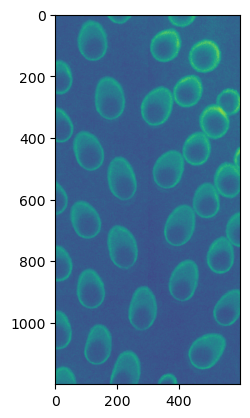

In [31]:
plt.imshow(sub_green[300])

In [30]:
h5_file_path = "subregion_Epithelial_mesenchyme_recombinations_scene 2_cropped.h5"
with h5py.File(h5_file_path, "w") as h5f:
    h5f.create_dataset("green", data = sub_green)
    h5f.create_dataset("red", data = sub_red)

# Only consider the subregion: one for in the main strain and one on the branch.

In [11]:
# channel_green = image_stack[:, 0, :, :]
# print("channel green shape:", channel_green.shape)
# plt.imshow(channel_green[300])

### Subregion for anterior-posterior flow

In [12]:
# plt.imshow(channel_green[300][0:900, 1200:1700]) # (y-axis, x-axis)

In [13]:
# plt.imshow(channel_red[300][0:900, 1200:1700])

### Subregion for horizontal flow

### Subregion for mixed regions -- both anterior-posterior and horizontal flow. 

In [14]:
# plt.imshow(channel_green[300][0:900, 800:1700])

In [15]:
# plt.imshow(channel_green[300][0:900, 800:1700])

In [16]:
# sub_green = np.array(channel_green[:][0:900, 800:1700])
# sub_green.shape

In [17]:
# plt.imshow(sub_green[300][0:900, 800:1700])

In [18]:
# plt.imshow(channel_red[300][0:900, 800:1700])